In [6]:
# Import libraries
import numpy as np
import pandas as pd

pd.options.display.max_columns = 50

# Disable warnings in Anaconda
import warnings
warnings.simplefilter('ignore')

# Display plots inside Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# import Seaborn
import seaborn as sns

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'




In [7]:
# Upload the data on telecom churn

df = pd.read_csv("../../data/telecom_churn.csv")


In [8]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Univariate analysis
#### Quantitative features
_Quantitative features_ take on ordered numerical values. Those values can be discrete, like integers, or continuous, like real numbers, and usually express a count or a measurement.


Most used ways to visyalise quantitative features are _histograms_ and _boxplots_

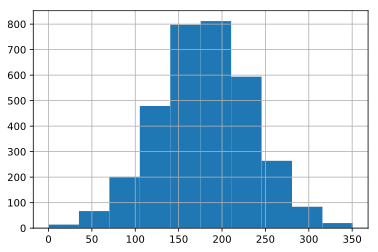

In [15]:
# Histograms
df['Total day minutes'].hist();  # ";" allows not to print the object name (as by default)

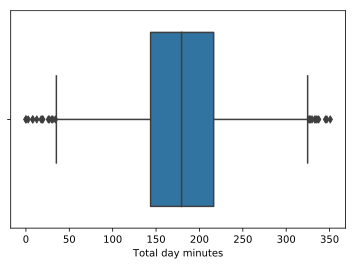

In [19]:
# Boxplot using Seaborn
sns.boxplot(df['Total day minutes']);

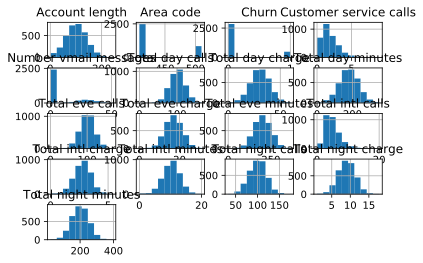

In [21]:
# Default histograms for all univariate quant features
df.hist();

#### Categorical features

We have the following categorical features: States and Churn

In [23]:
df.State.value_counts().head()

WV    106
MN     84
NY     83
AL     80
OR     78
Name: State, dtype: int64

In [24]:
df.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

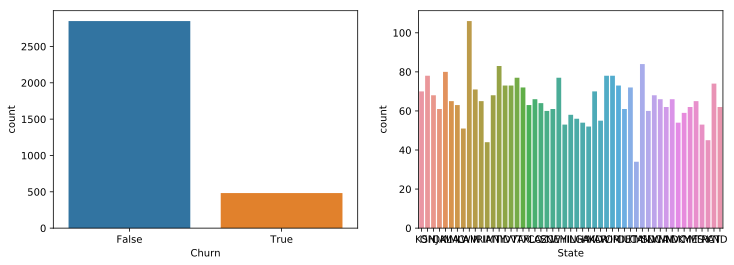

In [39]:
# Countplot (use for Categorical)
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

#sns.countplot(x='Churn', data=df, ax=axes[0]);
#sns.countplot(x='Customer service calls', data=df, ax=axes[1]);
sns.countplot(df.Churn, ax = axes[0]);
sns.countplot(x = 'State', data = df, ax = axes[1]);



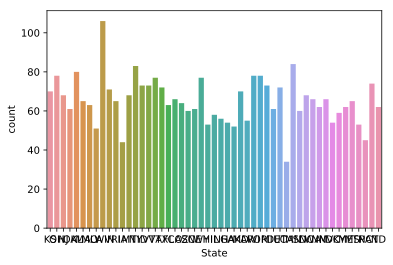

In [31]:
sns.countplot(df.State);

In [43]:
# Choose 5 most popular states
df.State.value_counts().head().index

Index(['WV', 'MN', 'NY', 'AL', 'OR'], dtype='object')

In [44]:
df[df["State"].isin(df.State.value_counts().head().index)]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
45,OR,59,408,No,Yes,28,120.9,97,20.55,213.0,92,18.11,163.1,116,7.34,8.5,5,2.30,2,False
62,MN,74,510,No,Yes,33,193.7,91,32.93,246.1,96,20.92,138.0,92,6.21,14.6,3,3.94,2,False


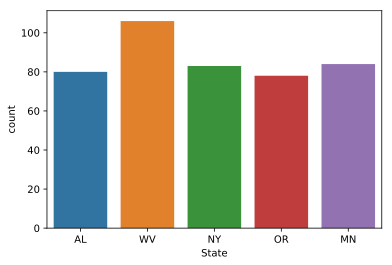

In [48]:
#Now we can plot the distribution of the most popular states
sns.countplot(df[df["State"].isin(df.State.value_counts().head().index)]['State']);

### 2. Interactions


#### 2.1 Quantitative - quantitative

In [51]:
# Select columns with "charge" in column names

feat = [f for f in df.columns if 'charge' in f]

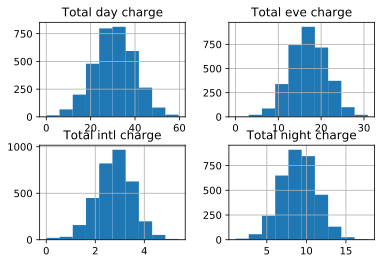

In [57]:
df[feat].hist();

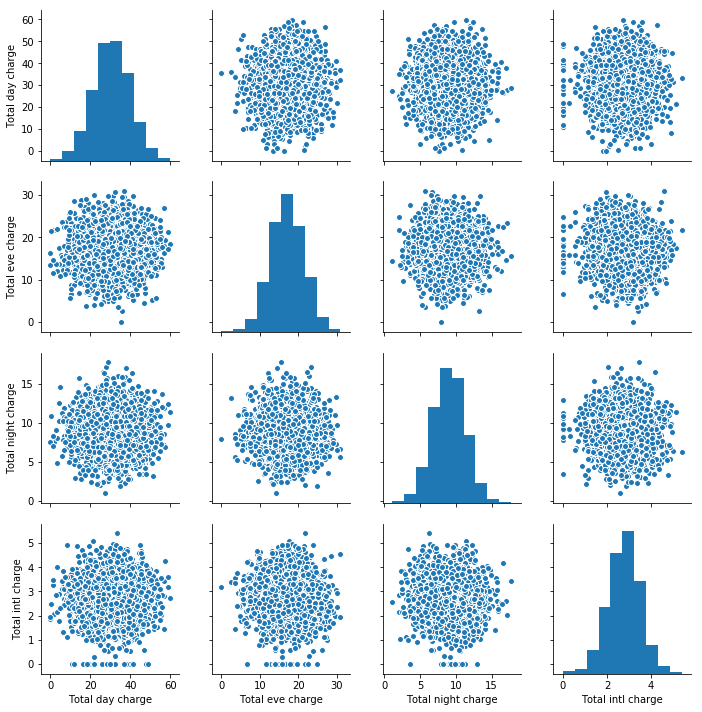

In [61]:
# Pairplot charts

%config InlineBackend.figure_format = 'png' 

sns.pairplot(df[feat]);

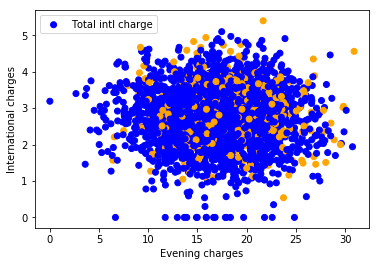

In [77]:
# Let's take a closer look at evening vs international
plt.scatter(df['Total eve charge'], df['Total intl charge'],
           color = df['Churn'].map({False: 'blue', True: 'orange'})); # we map Churn to colors
# Add x label
plt.xlabel('Evening charges')
plt.ylabel('International charges')
# Add legend
plt.legend();

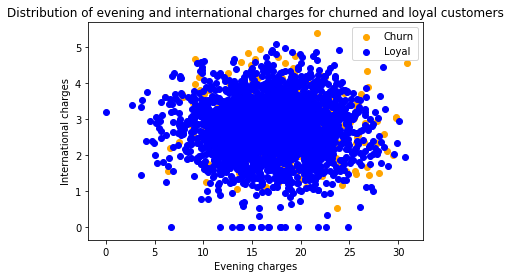

In [83]:
# Let's take a closer look at evening vs international
plt.scatter(df[df['Churn']]['Total eve charge'], df[df['Churn']]['Total intl charge'],
           color = 'orange', label = 'Churn'); #  loyal customers
plt.scatter(df[-df['Churn']]['Total eve charge'], df[-df['Churn']]['Total intl charge'],
           color = 'blue', label = 'Loyal'); # we map Churn to colors
# Add x label
plt.xlabel('Evening charges')
plt.ylabel('International charges')
# Add legend
plt.legend();
#Add title
plt.title("Distribution of evening and international charges for churned and loyal customers");

In [84]:
# Correlations
df.corr() # Pearson correlation (for quantitative feature)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


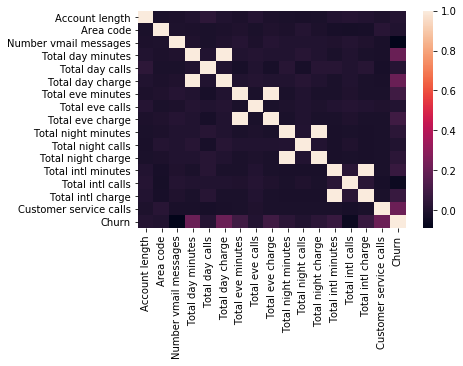

In [86]:
# Visualise it via Heatmap
sns.heatmap(df.corr());

In [87]:
# How to remove something from a dataframe?
??df.drop()

In [89]:
df.drop(feat, axis =1).head() # drop features that have 'charge' in the name. 
#Note, that we don't remove thesse columns in  DF

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [90]:
# to remove completely:
df.drop(feat, axis = 1, inplace = True)

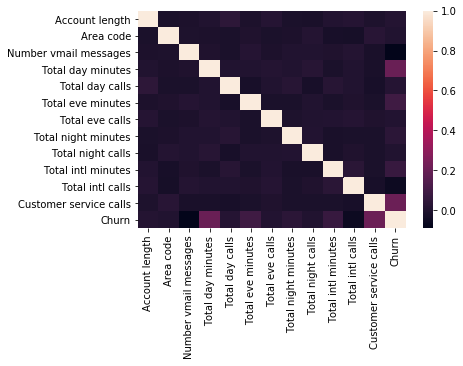

In [92]:
sns.heatmap(df.corr());

#### 2.2.Quantitaive - qualitative and quantitative - binary interactions

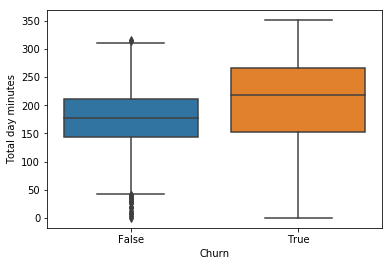

In [94]:
# Boxplots
sns.boxplot(x = 'Churn', y  = 'Total day minutes', data = df);

Interestingly, that those who leave the telecom provider (Churn = True) speak more than the loyal customers

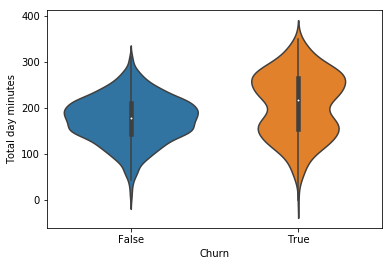

In [96]:
# Violin plot
sns.violinplot(x = 'Churn', y  = 'Total day minutes', data = df);

Violin plot doesn't add much info vs boxplot. Additional info is that in case of Churned customers the distribution of Day Minutes is bimodal

In [97]:
# How is international calls feature differes by loyal and not loyal customers?
df.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

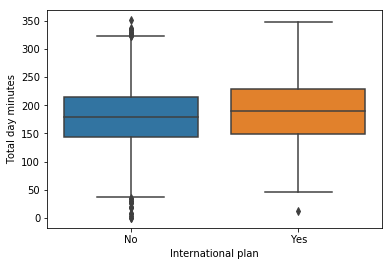

In [101]:
sns.boxplot(x = 'International plan', y = 'Total day minutes', data = df);

#### 2.3. Categorical-categorical

In [102]:
pd.crosstab(df.Churn, df['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


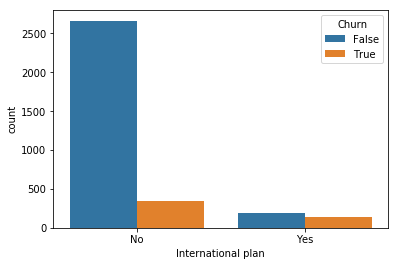

In [104]:
sns.countplot(x = 'International plan', hue = 'Churn', data = df);

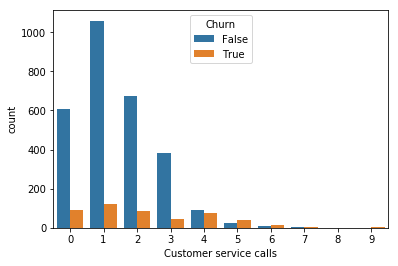

In [105]:
sns.countplot(x = 'Customer service calls', hue = 'Churn', data = df);

The distribution of loyal customers is hugely skewed until the number of calls to the service center exceeds 4: in that case there is a  spike in churns

### Whole dataset

#### [t-SNE (manifold learning)](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) t-distributed Stochastic Neighbor Embedding

Essentially, _neighbor embedding_ is a search for a new and less-dimensional data representation that preserves neighborship of examples.

We want to reduce the dimensionality of our data.
Neighbor embedding idea is to preserve the closeness of neighbors in N-dimensional enviroment in a lower-dimensional environment.

In [133]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [109]:
?TSNE

In [112]:
# First, remove character features
df_2 = df.drop('State', axis = 1)

In [113]:
df_2['International plan'] = df_2['International plan'].map({'Yes':1, "No": 0})

In [114]:
df_2['Voice mail plan'] = df_2['Voice mail plan'].map({'Yes':1, "No": 0})

In [115]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null int64
Voice mail plan           3333 non-null int64
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Customer service calls    3333 non-null int64
Churn                     3333 non-null bool
dtypes: bool(1), float64(4), int64(10)
memory usage: 367.9 KB


We need to normalize data first

In [135]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_2)

In [138]:
# Create an object TSNE

tsne = TSNE(random_state=17)
%time tsne_repr = tsne.fit_transform(df_scaled)

CPU times: user 1min 34s, sys: 8.85 s, total: 1min 43s
Wall time: 1min 47s


In [119]:
# HOw to see all the methods of the object?
dir(tsne)

['_EXPLORATION_N_ITER',
 '_N_ITER_CHECK',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_fit',
 '_get_param_names',
 '_tsne',
 'angle',
 'early_exaggeration',
 'embedding_',
 'fit',
 'fit_transform',
 'get_params',
 'init',
 'kl_divergence_',
 'learning_rate',
 'method',
 'metric',
 'min_grad_norm',
 'n_components',
 'n_iter',
 'n_iter_',
 'n_iter_final',
 'n_iter_without_progress',
 'perplexity',
 'random_state',
 'set_params',
 'verbose']

In [122]:
tsne.embedding_.shape

(3333, 2)

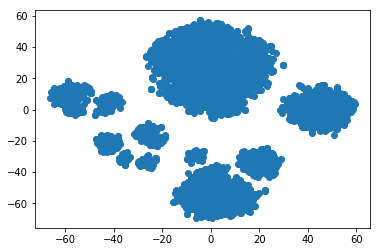

In [139]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1]);

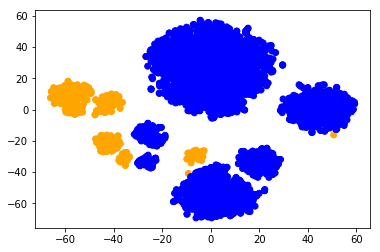

In [144]:
# Color according to customer loyalty
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            color = df['Churn'].map({True: 'orange', False: 'blue'}));

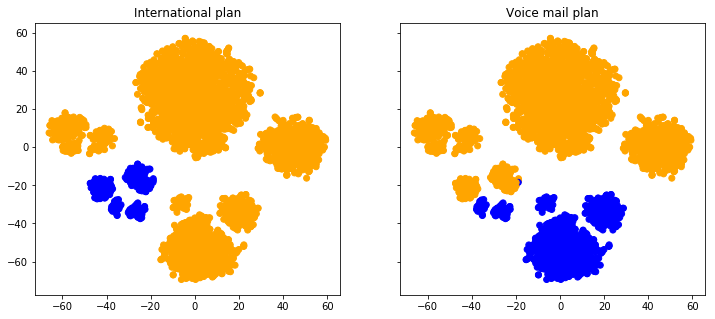

In [146]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=df[name].map({'Yes': 'blue', 'No': 'orange'}));
    axes[i].set_title(name);

Sourced from a notebook from an ODS course: [https://habrahabr.ru/company/ods/blog/323210/]


Now it is clear that, for example, many dissatisfied customers who canceled their subscription are crowded together in the most south-west cluster that represents the people with the international plan but no voice mail.

Finally, let's note some disadvantages of t-SNE:
- High computational complexity. The [implementation](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) in `scikit-learn` is unlikely to be feasible in a real task. If you have a large number of samples, you should try [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE) instead.
- The plot can change a great deal depending on the random seed, which complicates interpretation. [Here](http://distill.pub/2016/misread-tsne/) is a good tutorial on t-SNE. In general, you shouldn’t make any far-reaching conclusions based on such graphs because it can equate to plain guessing. Of course, some findings in t-SNE pictures can inspire an idea and be confirmed through more thorough research down the line, but that does not happen very often.

Occasionally, using t-SNE, you can get a really good intuition for the data. The following is a good paper that shows an example of this for handwritten digits: [Visualizing MNIST](https://colah.github.io/posts/2014-10-Visualizing-MNIST/).

<img src='../../img/tsne_mnist.png' />

## Real data set

In [147]:
# Survey data

In [148]:
poll_data = pd.read_csv('../../data/mlcourse_open_first_survey_parsed.csv')

In [149]:
poll_data.head()

,id,Timestamp,Представьтесь в 2-3 фразах,Работали ли Вы с Jupyter notebooks?,Что Вы ждете от курса?,Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?,"Ладно, посерьезней: согласны ли Вы на обработку персональных данных?","Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)","Чему равна дисперсия равномерного на [0,6] распределения?","Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]",Сколько параметров у нормального распределения?,Сможете написать на Python генератор чисел Фибоначчи?,"Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro",Оцените свой уровень владения GitHub,"Посоветуйте хороший фильм в стиле ""Игра в имитацию"" :)"
0,0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN
2,2,2016/12/05 10:47:07 am GMT+3,"Я Software Engeneer разработчик, активно интер...",Да,Побольше практики на реальных данных (задачах).,basketball,Да,3,3,NaN,2.0,Да,Да,Проф,NaN
3,3,2016/12/05 10:47:22 am GMT+3,Семилетний инженер. Специализируюсь в компьюте...,Да,Глубокого разбора алгоритмов и инструментов.,NaN,Да,3,0.5,-12,2.0,Да,Да,"Пользуюсь ветками, могу что-то смерджить",Король говорит
4,5,2016/12/05 10:58:34 am GMT+3,программист. pl/sql python,Да,Упорядочить знания,футбол,Да,3,3,-12,2.0,Да,уже знаю,"Пользуюсь ветками, могу что-то смерджить",NaN


Now let's rename columns,namely, map column names to the new column names

In [156]:
rename_dic = dict(zip(poll_data.columns,
                      ['id','time', 'intro', 'jupyter', 'expect', 'sport',
                       'personal', 'math_level', 'quest_1', 'quest_2', 
                       'quest_3', 'fib_gen', 'pyhton', 'github', 'movie']))
# zip maps two lists together
# zipped object is converted to a dictionary

In [157]:
poll_data.rename(columns= rename_dic, inplace = True)

In [158]:
poll_data.head()

,id,time,intro,jupyter,expect,sport,personal,math_level,quest_1,quest_2,quest_3,fib_gen,pyhton,github,movie
0,0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN
2,2,2016/12/05 10:47:07 am GMT+3,"Я Software Engeneer разработчик, активно интер...",Да,Побольше практики на реальных данных (задачах).,basketball,Да,3,3,NaN,2.0,Да,Да,Проф,NaN
3,3,2016/12/05 10:47:22 am GMT+3,Семилетний инженер. Специализируюсь в компьюте...,Да,Глубокого разбора алгоритмов и инструментов.,NaN,Да,3,0.5,-12,2.0,Да,Да,"Пользуюсь ветками, могу что-то смерджить",Король говорит
4,5,2016/12/05 10:58:34 am GMT+3,программист. pl/sql python,Да,Упорядочить знания,футбол,Да,3,3,-12,2.0,Да,уже знаю,"Пользуюсь ветками, могу что-то смерджить",NaN


In [159]:
poll_data['jupyter'].value_counts().head()

Да            2071
Нет            766
немного          7
Немного          3
Spyder IDE       2
Name: jupyter, dtype: int64

In [164]:
jupyter_level = poll_data['jupyter'].map({'Да':1, 'Нет': 0}).fillna(2)
jupyter_level.value_counts()

1.0    2071
0.0     766
2.0     107
Name: jupyter, dtype: int64

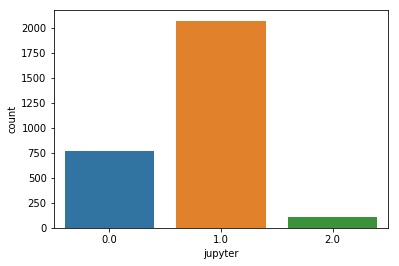

In [166]:
sns.countplot(jupyter_level);

In [168]:
poll_data.sport.value_counts().head()

Футбол       197
Баскетбол    113
футбол       113
Плавание      94
Хоккей        66
Name: sport, dtype: int64

In [169]:
# Let's check the proportion of coorectly answered question 3

In [170]:
poll_data['quest_3'].value_counts()

2.0    2519
1.0      86
3.0      80
4.0      40
Name: quest_3, dtype: int64

In [175]:
(poll_data['quest_3'] == 2).dropna().sum()/\
(poll_data['quest_3'][~poll_data['quest_3'].isnull()]).shape[0]

0.92440366972477062

92% of respondents correctly answered the question

In [179]:
poll_data.intro.apply(lambda s: s.strip().split()).tail()

2939        [Занимаюсь, анализом, данных, в, страховании]
2940                    [Аналитик, в, телеком, компании.]
2941    [Занимаюсь, сопровождением, автоматизированных...
2942                           [разработчик, Python,, JS]
2943    [Работал, аналитиком, в, разных, сферах,, вклю...
Name: intro, dtype: object

In [180]:
# Now concatenate all the lists
np.concatenate(poll_data.intro.apply(lambda s: s.strip().split()).values)

array(['крутой', 'Developer', 'Разработчик', ..., 'онлайн-банкинг.',
       'Увлекаюсь', 'программированием'],
      dtype='<U81')

In [200]:
# Now get all the words
all_words = np.concatenate(poll_data.intro.apply(lambda s: s.strip().split()).values)

In [185]:
len(all_words)


26533

In [193]:
pd.Series(list(all_words)).value_counts().head()

в          1235
и           734
на          409
по          283
Студент     279
dtype: int64

In [189]:
# Remove stop words
import nltk
from nltk.corpus import stopwords

In [190]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/owner/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [194]:
len(stopwords.words('russian'))
stop_rus = stopwords.words('russian')

In [198]:
words_series = pd.Series(list(all_words))
words_series[~words_series.isin(stop_rus)].value_counts().head(10)


Студент     279
Работаю     201
курса       187
данных      178
Data        173
Я           166
работаю     157
data        130
машинным    123
хочу        122
dtype: int64

Next steps: lowercase and draw a word cloud